In [37]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [38]:
df=pd.read_csv("rossmann-store-sales/train.csv")
df_store=pd.read_csv("rossmann-store-sales/store.csv")

C:\Users\Myra\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [39]:
df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [40]:
df_store.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [41]:
df=pd.merge(df, df_store, on='Store')

In [42]:
df.isnull().sum()

Store                             0
DayOfWeek                         0
Date                              0
Sales                             0
Customers                         0
Open                              0
Promo                             0
StateHoliday                      0
SchoolHoliday                     0
StoreType                         0
Assortment                        0
CompetitionDistance            2642
CompetitionOpenSinceMonth    323348
CompetitionOpenSinceYear     323348
Promo2                            0
Promo2SinceWeek              508031
Promo2SinceYear              508031
PromoInterval                508031
dtype: int64

In [43]:
df.CompetitionDistance.fillna(0,inplace=True)
df.CompetitionOpenSinceMonth.fillna(0,inplace=True)
df.CompetitionOpenSinceYear.fillna(0,inplace=True)

In [44]:
df.Date=pd.to_datetime(df.Date)
df["Year"]=df.Date.dt.year
df["Month"]=df.Date.dt.month
df["Week"]=df.Date.dt.week
df["Day"]=df.Date.dt.day

df.drop("Date",axis=1,inplace=True)

In [45]:
stores_average_weekly_customers=df.groupby(["Store","Month","Day"])["Customers"].mean().to_dict()

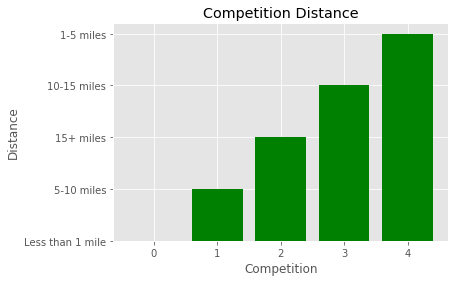

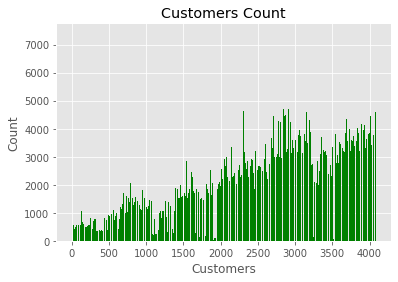

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Month,Week,Day,CompetitionSince,Promo2Since,In_PromoInterval
0,1,5,5263,5,1,1,1,1,2,0,4,0,7,31,31,93.0,0.0,0
1,1,4,5020,5,1,1,1,1,2,0,4,0,7,31,30,93.0,0.0,0
2,1,3,4782,5,1,1,1,1,2,0,4,0,7,31,29,93.0,0.0,0
3,1,2,5011,5,1,1,1,1,2,0,4,0,7,31,28,93.0,0.0,0
4,1,1,6102,5,1,1,1,1,2,0,4,0,7,31,27,93.0,0.0,0


In [46]:
StateHoliday_Mapping=dict( enumerate(df.StateHoliday.astype('category').cat.categories ) )
df.StateHoliday=df.StateHoliday.astype('category').cat.codes

Assortment_Mapping=dict( enumerate(df.Assortment.astype('category').cat.categories ) )
df.Assortment=df.Assortment.astype('category').cat.codes

# df.StoreType.astype('category').cat.codes
Store_Type_Mapping=dict( enumerate(df.StoreType.astype('category').cat.categories ) )
df.StoreType=df.StoreType.astype('category').cat.codes

df.CompetitionDistance=df.CompetitionDistance.apply(lambda x: x*0.000621371192)

def dist_to_category(x):
    if(x<1):
        return "Less than 1 mile"
    elif(x>1 and x<5):
        return "1-5 miles"
    elif(x>5 and x<10):
        return "5-10 miles"
    elif(x>10 and x<15):
        return "10-15 miles"
    else:
        return "15+ miles"
df.CompetitionDistance=df.CompetitionDistance.apply(lambda x: dist_to_category(x))   



comp_dist_unique=df.CompetitionDistance.unique()

plt.bar([x for x in range(len(comp_dist_unique))], comp_dist_unique, color='green')
plt.xlabel("Competition")
plt.ylabel("Distance")
plt.title("Competition Distance")

plt.show()

Competition_Dist_Mapping=dict( enumerate(df.CompetitionDistance.astype('category').cat.categories ) )
df.CompetitionDistance=df.CompetitionDistance.astype('category').cat.codes

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

cust_count_unique=df.Customers.unique()

plt.bar([x for x in range(len(cust_count_unique))], cust_count_unique, color='green')
plt.xlabel("Customers")
plt.ylabel("Count")
plt.title("Customers Count")

plt.show()

def count_to_category(x):
    if(x<500):
        return "Less than 500 customers"
    elif(x>500 and x<1000):
        return "500-1000 customers"
    elif(x>1000 and x<1500):
        return "1000-1500 customers"
    elif(x>1500 and x<2000):
        return "1500-2000 customers"
    elif(x>2000 and x<2500):
        return "2000-2500 customers"
    elif(x>2500 and x<3000):
        return "2500-3000 customers"
    else:
        return "3000+ customers"
df.Customers=df.Customers.apply(lambda x: count_to_category(x))   

Customers_Count_Mapping=dict( enumerate(df.Customers.astype('category').cat.categories ) )
df.Customers=df.Customers.astype('category').cat.codes

df["CompetitionSince"]=df.Year-df.CompetitionOpenSinceYear

df[df.CompetitionSince<0]

df.drop("CompetitionOpenSinceYear",axis=1,inplace=True)

df.CompetitionSince=df.CompetitionSince.apply(lambda x: 0 if x<0 else x)

df.CompetitionSince=df.CompetitionSince.apply(lambda x: x*12)
df.CompetitionSince=df.CompetitionSince+df.CompetitionOpenSinceMonth

df.drop("CompetitionOpenSinceMonth",axis=1,inplace=True)

df['Promo2SinceWeek'] = df['Promo2SinceWeek'].fillna(0)
df['Promo2SinceYear'] = df['Promo2SinceYear'].fillna(0)

df["Promo2Since"]=df.Year-df.Promo2SinceYear
df.loc[df.Promo2Since==df.Year,"Promo2Since"]=0

df.Promo2Since=df.Promo2Since.apply(lambda x: x*52)
df.Promo2Since=df.Promo2Since+df.Promo2SinceWeek

df.drop("Year",axis=1,inplace=True)
df.drop("Promo2SinceWeek",axis=1,inplace=True)
df.drop("Promo2SinceYear",axis=1,inplace=True)

df['PromoInterval'] = df['PromoInterval'].fillna('')

def get_month_number(x):
    if(x=='Jan'):
        return 1
    elif(x=='Feb'):
        return 2
    elif(x=="Mar"):
        return 3
    elif(x=='Apr'):
        return 4
    elif(x=="May"):
        return 5
    elif(x=='Jun'):
        return 6
    elif(x=="Jul"):
        return 7
    elif(x=='Aug'):
        return 8
    elif(x=="Sept"):
        return 9
    elif(x=='Oct'):
        return 10
    elif(x=="Nov"):
        return 11
    elif(x=="Dec"):
        return 12
    else:
        return None
def check_promo2_interval(row):
    promo2_interval=row["PromoInterval"]
    current_month=row["Month"]
    if(promo2_interval==""):
        return 0
    promo2_interval=promo2_interval.split(',')
    
    for x in promo2_interval:
        n=get_month_number(x)
        if(n==current_month):
            return 1
    return 0
df["In_PromoInterval"]=df.apply(lambda x: check_promo2_interval(x),axis=1)

df.loc[df["PromoInterval"]!="",["PromoInterval","Month","In_PromoInterval"]]

df.drop("PromoInterval",axis=1,inplace=True)

df.head()

In [47]:
df.dtypes

Store                    int64
DayOfWeek                int64
Sales                    int64
Customers                 int8
Open                     int64
Promo                    int64
StateHoliday              int8
SchoolHoliday            int64
StoreType                 int8
Assortment                int8
CompetitionDistance       int8
Promo2                   int64
Month                    int64
Week                     int64
Day                      int64
CompetitionSince       float64
Promo2Since            float64
In_PromoInterval         int64
dtype: object

In [48]:
df.isnull().sum()

Store                  0
DayOfWeek              0
Sales                  0
Customers              0
Open                   0
Promo                  0
StateHoliday           0
SchoolHoliday          0
StoreType              0
Assortment             0
CompetitionDistance    0
Promo2                 0
Month                  0
Week                   0
Day                    0
CompetitionSince       0
Promo2Since            0
In_PromoInterval       0
dtype: int64

In [49]:
from sklearn import preprocessing

x = df.loc[:,df.columns!="Sales"] #returns a numpy array
columns=x.columns
x=x.values

y=df.loc[:,"Sales"]
min_max_scaler = preprocessing.StandardScaler()
x_scaled = min_max_scaler.fit_transform(x)
X = pd.DataFrame(x_scaled,columns=columns)

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import math
from sklearn.model_selection import train_test_split # Import train_test_split function

In [51]:
regressors=[]
names=[]

model1 = LinearRegression()
regressors.append(model1)
names.append('Linear Regression')

model2 = GradientBoostingRegressor()
regressors.append(model2)
names.append('Gradient Boosting Regressor')

model3 = RandomForestRegressor()
regressors.append(model3)
names.append('Random Forest Regressor')

model4 = Ridge()
regressors.append(model4)
names.append('Ridge')

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [53]:
for i,rgr in enumerate(regressors):
    rgr.fit(X_train, y_train)
    y_pred= rgr.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(math.sqrt(mse))

2052.7882584033005
1428.7269635369187


C:\Users\Myra\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


738.8584070141081
2052.788263407831
